In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uci-ionosphere/ionosphere_data_kaggle.csv


In [2]:
# load dataset
data = pd.read_csv("../input/uci-ionosphere/ionosphere_data_kaggle.csv",delimiter=",")


In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [5]:
#Input vector and output vector
X = data.values[1:,0:34].astype(float)
Y = data.values[1:,34]

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [10]:
from keras.layers import Dropout

In [11]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34 , activation= 'relu' ))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
# Adding the second hidden layer
model.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
model.add(Dense(1,  activation= 'sigmoid' ))

In [12]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])

In [13]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=epochs, batch_size=8, verbose=2)

Train on 187 samples, validate on 93 samples
Epoch 1/50
 - 0s - loss: 0.4980 - accuracy: 0.7807 - val_loss: 0.3214 - val_accuracy: 0.8817
Epoch 2/50
 - 0s - loss: 0.2332 - accuracy: 0.9198 - val_loss: 0.4363 - val_accuracy: 0.8602
Epoch 3/50
 - 0s - loss: 0.1915 - accuracy: 0.9305 - val_loss: 0.4733 - val_accuracy: 0.8710
Epoch 4/50
 - 0s - loss: 0.1885 - accuracy: 0.9358 - val_loss: 0.3195 - val_accuracy: 0.8602
Epoch 5/50
 - 0s - loss: 0.0940 - accuracy: 0.9626 - val_loss: 0.3112 - val_accuracy: 0.8925
Epoch 6/50
 - 0s - loss: 0.1291 - accuracy: 0.9572 - val_loss: 0.2984 - val_accuracy: 0.8925
Epoch 7/50
 - 0s - loss: 0.1462 - accuracy: 0.9572 - val_loss: 0.3633 - val_accuracy: 0.8817
Epoch 8/50
 - 0s - loss: 0.0926 - accuracy: 0.9626 - val_loss: 0.2673 - val_accuracy: 0.9032
Epoch 9/50
 - 0s - loss: 0.0440 - accuracy: 0.9947 - val_loss: 0.3041 - val_accuracy: 0.8925
Epoch 10/50
 - 0s - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.3352 - val_accuracy: 0.9032
Epoch 11/50
 - 0s - loss

In [14]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[23,  3],
       [ 1, 43]])

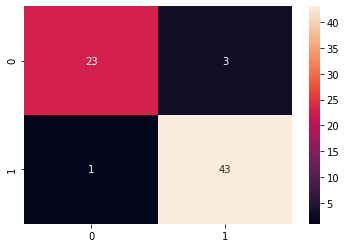

In [17]:
sns.heatmap(cm,annot=True)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9428571428571428

In [19]:
accuracy = accuracy_score(y_test,y_pred)*100

In [20]:
accuracy

94.28571428571428